# PCA of the turtles dataset from "Size and shape variation in the painted turtle. A principal component analysis"
https://pubmed.ncbi.nlm.nih.gov/13790416/

In [1]:
import numpy as np
import pylab as plt

from sklearn.decomposition import PCA

plt.style.use('mpl_style.txt')

In [2]:
X = '''F     98    81     38
  F    103    84     38
  F    103    86     42
  F    105    86     42
  F    109    88     44
  F    123    92     50
  F    123    95     46
  F    133    99     51
  F    133   102     51
  F    133   102     51
  F    134   100     48
  F    136   102     49
  F    138    98     51
  F    138    99     51
  F    141   105     53
  F    147   108     57
  F    149   107     55
  F    153   107     56
  F    155   115     63
  F    155   117     60
  F    158   115     62
  F    159   118     63
  F    162   124     61
  F    177   132     67
  M     93    74     37
  M     94    78     35
  M     96    80     35
  M    101    84     39
  M    102    85     38
  M    103    81     37
  M    104    83     39
  M    106    83     39
  M    107    82     38
  M    112    89     40
  M    113    88     40
  M    114    86     40
  M    116    90     43
  M    117    90     41
  M    117    91     41
  M    119    93     41
  M    120    89     40
  M    121    93     44
  M    121    95     42
  M    125    93     45
  M    127    96     45
  M    128    95     45
  M    131    95     46
  M    135   106     47'''.split('\n')

X = [[xx.strip() for xx in x.split()] for x in X]

X = np.array(X)
g = X[:, 0]
X = X[:, 1:].astype(float)

pca = PCA()
Z = pca.fit_transform(X)

expl_var = pca.explained_variance_ratio_

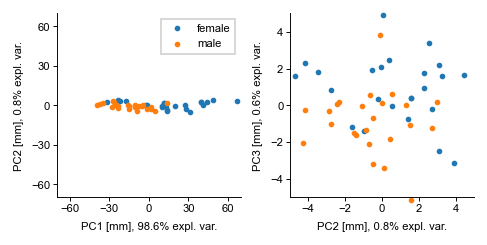

In [3]:
fig, axs = plt.subplots(ncols=2, figsize=(3.5, 1.7))

axs[0].set_aspect('equal')
axs[0].scatter(Z[g == 'F', 0], Z[g == 'F', 1], label='female', clip_on=False)
axs[0].scatter(Z[g == 'M', 0], Z[g == 'M', 1], label='male', clip_on=False)
axs[0].set_xlabel(f'PC1 [mm], {expl_var[0]:.1%} expl. var.')
axs[0].set_ylabel(f'PC2 [mm], {expl_var[1]:.1%} expl. var.')
axs[0].legend(frameon=True)
axs[0].set_xlim([-70, 70])
axs[0].set_ylim([-70, 70])
axs[0].set_xticks([-60, -30, 0, 30, 60])
axs[0].set_yticks([-60, -30, 0, 30, 60])

axs[1].set_aspect('equal')
axs[1].scatter(Z[g == 'F', 1], Z[g == 'F', 2], clip_on=False)
axs[1].scatter(Z[g == 'M', 1], Z[g == 'M', 2], clip_on=False)
axs[1].set_xlabel(f'PC2 [mm], {expl_var[1]:.1%} expl. var.')
axs[1].set_ylabel(f'PC3 [mm], {expl_var[2]:.1%} expl. var.')
axs[1].set_xlim([-5, 5])
axs[1].set_ylim([-5, 5])
axs[1].set_xticks([-4, -2, 0, 2, 4])
axs[1].set_yticks([-4, -2, 0, 2, 4])

fig.savefig('../figures/turtles.pdf')
fig.savefig('../figures/turtles.png', dpi=300)